In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

In [2]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
fldr='/kaggle/input/utkface-new/UTKFace'

In [4]:
import os
files=os.listdir(fldr)

In [5]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[1])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

In [6]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

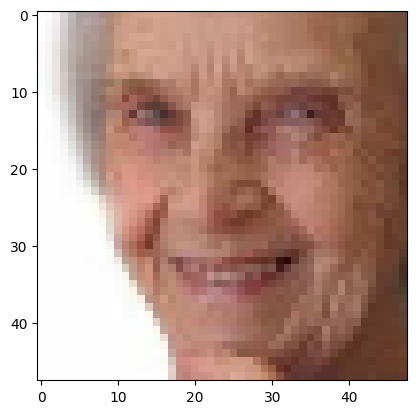

In [7]:
plt.imshow(images[45])

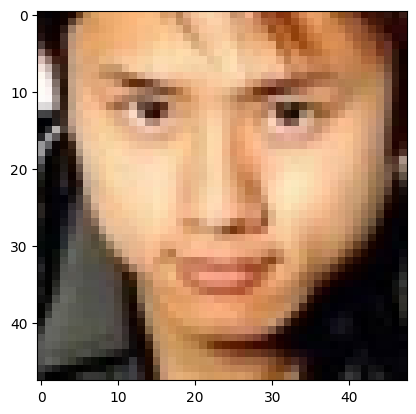

In [8]:
plt.imshow(images[0])

In [9]:
print(ages[87])


35


In [10]:
print(genders[87])

1


In [11]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [12]:
np.save('/kaggle/working/image.npy',images_f)
np.save('/kaggle/working/ages.npy',ages_f)
np.save('/kaggle/working/genders.npy',genders_f)

In [13]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


# plotting the no of male and female sample

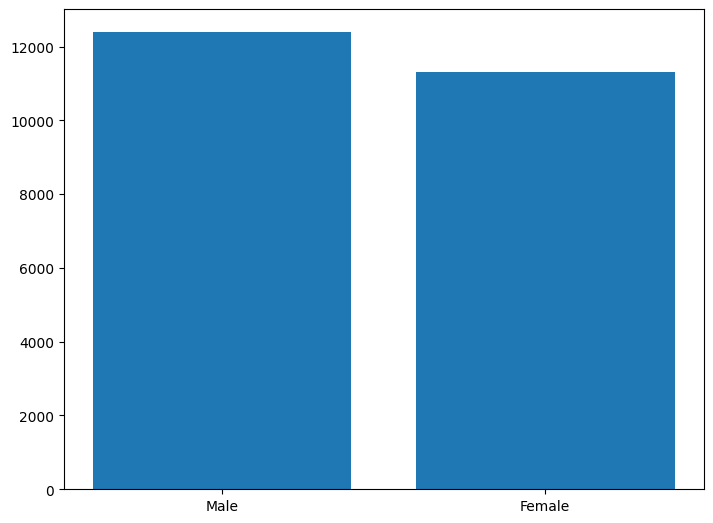

In [14]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

# ##finding the no of sample in each age

In [15]:
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


# converting age counts to list

In [16]:
val=values.tolist()
cnt=counts.tolist()

# ##plotting the samples age wise

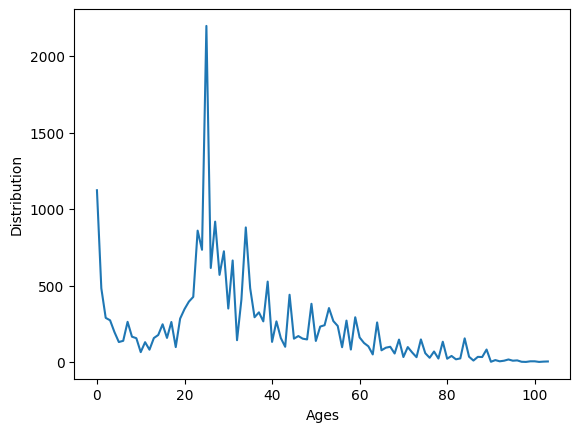

In [17]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

# ##Defining labels for output

In [18]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

# ##creating another list of images from existing one

In [19]:
images_f_2=images_f/255

In [20]:
images_f_2.shape

(23708, 48, 48, 3)

In [21]:
labels_f=np.array(labels)

# ##splitting the dataset into train test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [24]:
Y_train[0:5]

array([[26,  0],
       [26,  0],
       [ 1,  0],
       [26,  0],
       [26,  1]])

# ##splitting y_test and y_train further

In [25]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [26]:
Y_train_2[0][0:5]

array([0, 0, 0, 0, 1])

In [27]:
Y_train_2[1][0:5]

array([26, 26,  1, 26, 26])

# ##defining the model

In [28]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Activation,Dense
from tensorflow.keras import regularizers

In [29]:
def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding='same', strides=(1, 1), kernel_regularizer=regularizers.l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x


In [30]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    conv_5=Convolution(maxp_4,512)
    maxp_5=MaxPooling2D(pool_size=(2,2))(conv_5)
    flatten=Flatten()(maxp_5)
    dense_1=Dense(64,activation='swish')(flatten)
    dense_2=Dense(64,activation='swish')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='swish',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy','mae'],optimizer='Adam',metrics=['accuracy'])
    return model

In [31]:
Model=model((48,48,3))

In [32]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 48, 48, 32)           896       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 48, 48, 32)           0         ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 48, 48, 32)           0         ['dropout[0][0]']             
                                                                                              

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Initialiazing the model 

In [34]:
fle_s='/kaggle/working/Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=25,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

# Running the model

In [35]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=5,callbacks=callback_list)

Epoch 1/5


2024-01-26 04:29:25.003004: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


278/278 [==============================] - ETA: 0s - loss: 16.7221 - sex_out_loss: 0.7015 - age_out_loss: 15.7186 - sex_out_accuracy: 0.5276 - age_out_accuracy: 0.0484
Epoch 1: val_loss improved from inf to 15.40059, saving model to /kaggle/working/Age_Sex_Detection.h5
278/278 [==============================] - 12s 21ms/step - loss: 16.7221 - sex_out_loss: 0.7015 - age_out_loss: 15.7186 - sex_out_accuracy: 0.5276 - age_out_accuracy: 0.0484 - val_loss: 15.4006 - val_sex_out_loss: 0.6625 - val_age_out_loss: 14.4692 - val_sex_out_accuracy: 0.5738 - val_age_out_accuracy: 0.0440
Epoch 2/5
  5/278 [..............................] - ETA: 3s - loss: 14.3516 - sex_out_loss: 0.6821 - age_out_loss: 13.3998 - sex_out_accuracy: 0.5469 - age_out_accuracy: 0.0500

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


277/278 [============================>.] - ETA: 0s - loss: 12.5511 - sex_out_loss: 0.6069 - age_out_loss: 11.6129 - sex_out_accuracy: 0.6701 - age_out_accuracy: 0.0461
Epoch 2: val_loss improved from 15.40059 to 12.18171, saving model to /kaggle/working/Age_Sex_Detection.h5
278/278 [==============================] - 4s 15ms/step - loss: 12.5527 - sex_out_loss: 0.6069 - age_out_loss: 11.6144 - sex_out_accuracy: 0.6702 - age_out_accuracy: 0.0461 - val_loss: 12.1817 - val_sex_out_loss: 0.5857 - val_age_out_loss: 11.2203 - val_sex_out_accuracy: 0.6838 - val_age_out_accuracy: 0.0440
Epoch 3/5
277/278 [============================>.] - ETA: 0s - loss: 10.5978 - sex_out_loss: 0.5246 - age_out_loss: 9.6744 - sex_out_accuracy: 0.7409 - age_out_accuracy: 0.0479
Epoch 3: val_loss improved from 12.18171 to 12.11994, saving model to /kaggle/working/Age_Sex_Detection.h5
278/278 [==============================] - 4s 16ms/step - loss: 10.5953 - sex_out_loss: 0.5247 - age_out_loss: 9.6717 - sex_out_acc

# Model evaluation

In [36]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 1s 4ms/step - loss: 11.5285 - sex_out_loss: 0.5343 - age_out_loss: 10.5227 - sex_out_accuracy: 0.7152 - age_out_accuracy: 0.0440


[11.52846622467041,
 0.5343177914619446,
 10.522745132446289,
 0.7152016162872314,
 0.04403576999902725]

In [37]:
pred=Model.predict(X_test)

186/186 [==============================] - 1s 2ms/step


In [38]:
pred[1]

array([[ 1.3787693],
       [17.019135 ],
       [22.633825 ],
       ...,
       [23.718735 ],
       [22.310555 ],
       [ 1.4283746]], dtype=float32)

# Model evaluation

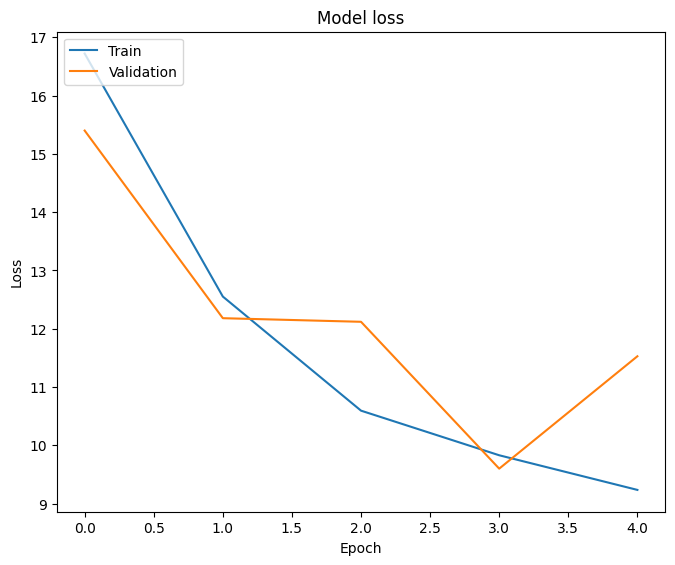

In [39]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# plotting sex accuracy

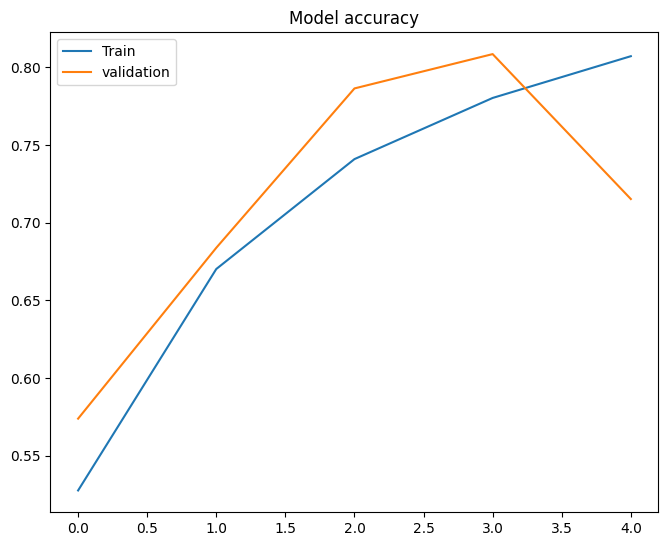

In [40]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# plotting gender accuracy

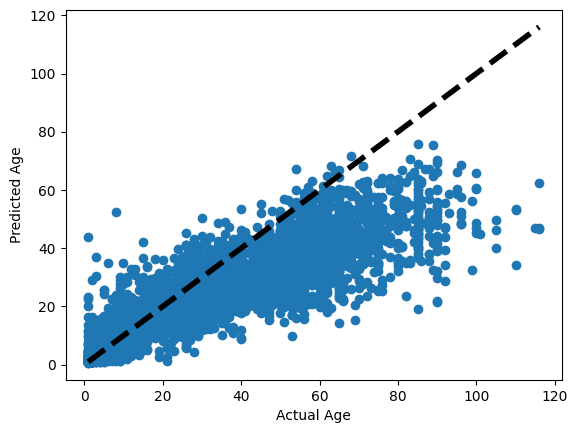

In [41]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

# making report of the model

In [42]:
i=0
pred_l=[]
while(i<len(pred[0])):
    pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [44]:
report=classification_report(Y_test_2[0],pred_l)

In [45]:
print(report)

              precision    recall  f1-score   support

           0       0.95      0.48      0.63      3076
           1       0.63      0.97      0.77      2851

    accuracy                           0.72      5927
   macro avg       0.79      0.72      0.70      5927
weighted avg       0.80      0.72      0.70      5927



In [46]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [47]:
results=confusion_matrix(Y_test_2[0],pred_l)

# making heatmap of the model(gender only)

<Axes: >

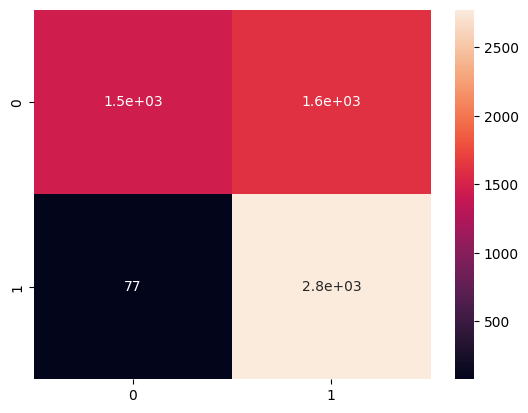

In [48]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [49]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print('Predicted Age is '+str(age))
    print('Predicted Gender is '+sex_f[sex])

# testing the images ourself

1/1 [==============================] - 0s 234ms/step
Predicted Age is 18
Predicted Gender is Female


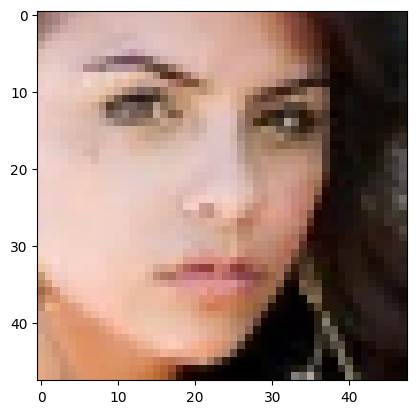

In [50]:
test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 21ms/step
Predicted Age is 3
Predicted Gender is Female


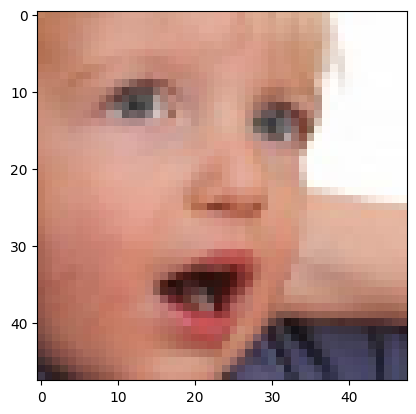

In [51]:
test_image(22,images_f,images_f_2,Model)

1/1 [==============================] - 0s 19ms/step
Predicted Age is 35
Predicted Gender is Female


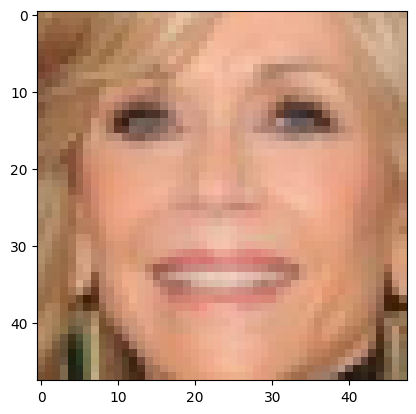

In [52]:
test_image(168,images_f,images_f_2,Model)

1/1 [==============================] - 0s 19ms/step
Predicted Age is 44
Predicted Gender is Male


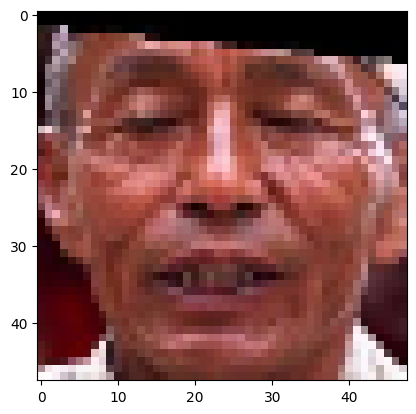

In [53]:
test_image(888,images_f,images_f_2,Model)

1/1 [==============================] - 0s 19ms/step
Predicted Age is 28
Predicted Gender is Female


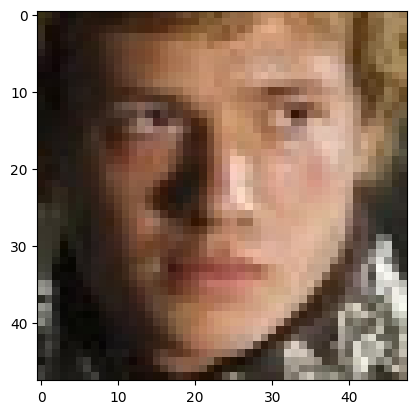

In [54]:
test_image(1288,images_f,images_f_2,Model)